In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:

!wget  "https://storage.googleapis.com/open_source_datasets/product_detection_from_packshots.tar.gz"
 

--2022-02-21 07:36:40--  https://storage.googleapis.com/open_source_datasets/product_detection_from_packshots.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 947415270 (904M) [application/gzip]
Saving to: ‘product_detection_from_packshots.tar.gz’

product_detection_f 100%[===================>] 903.53M  46.4MB/s    in 20s     

2022-02-21 07:37:00 (46.1 MB/s) - ‘product_detection_from_packshots.tar.gz’ saved [947415270/947415270]



In [ ]:
!tar -xvf  'product_detection_from_packshots.tar.gz' -C '/content/gdrive/MyDrive/infilect_assignment'

In [ ]:
from matplotlib.pyplot import imshow
from PIL import Image
import os

In [ ]:
shelfImagePath='/content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots/shelf_images/'
productImagePath='/content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots/product_images/'
#path to the unzipped dataset

In [ ]:
print(len(os.listdir(shelfImagePath)))
print(len(os.listdir(productImagePath)))
#few images in the product were augmented to bring about equal number of three per image,hence total prodouct image=306
#length of the dataset

3153
306


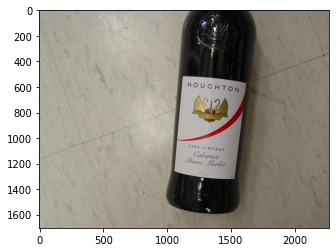

In [ ]:
#sample product image
productImageSample='/content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots/product_images/qr1.jpg'
product = Image.open(productImageSample)
imshow(product)


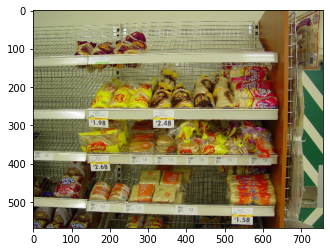

In [ ]:
#sample shelf image
shelfImageSample='/content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots/shelf_images/db1.jpg'
shelf = Image.open(shelfImageSample)
imshow(shelf)

In [ ]:
import os
import re
import pandas as pd
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from numpy import expand_dims
from keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split


In [ ]:
#checking and assigning each product images thier respective labels
path='/content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots/product_images/'
Images = os.listdir('/content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots/product_images/')
Images.sort(key=lambda f: int(re.sub('\D','',f)))
ID=[]
count=0
k=0
for i in range(306):
  ID.append(k)
  count+=1
  if count==3:
    count=0
    k+=1

ImageDF=pd.DataFrame({ 'imagePath': Images,'ImageID':ID})
ImageDF['imagePath'] = path + ImageDF['imagePath'].astype(str)  
ImageDF

imagePath  ImageID
0    /content/gdrive/MyDrive/infilect_assignment/pr...        0
1    /content/gdrive/MyDrive/infilect_assignment/pr...        0
2    /content/gdrive/MyDrive/infilect_assignment/pr...        0
3    /content/gdrive/MyDrive/infilect_assignment/pr...        1
4    /content/gdrive/MyDrive/infilect_assignment/pr...        1
..                                                 ...      ...
301  /content/gdrive/MyDrive/infilect_assignment/pr...      100
302  /content/gdrive/MyDrive/infilect_assignment/pr...      100
303  /content/gdrive/MyDrive/infilect_assignment/pr...      101
304  /content/gdrive/MyDrive/infilect_assignment/pr...      101
305  /content/gdrive/MyDrive/infilect_assignment/pr...      101

[306 rows x 2 columns]

In [ ]:
#preprocessing images according to img size for model training
imageList=[]
IDList=[]
for i in range(len (ImageDF.imagePath)):
  img=plt.imread(ImageDF.imagePath[i])
  img=tf.keras.preprocessing.image.smart_resize(img, size = (224,224))
  img-=img.min()
  img/=(img.max()-img.min())
  imageList.append(img)
  id=ImageDF.ImageID[i]
  IDList.append(id)

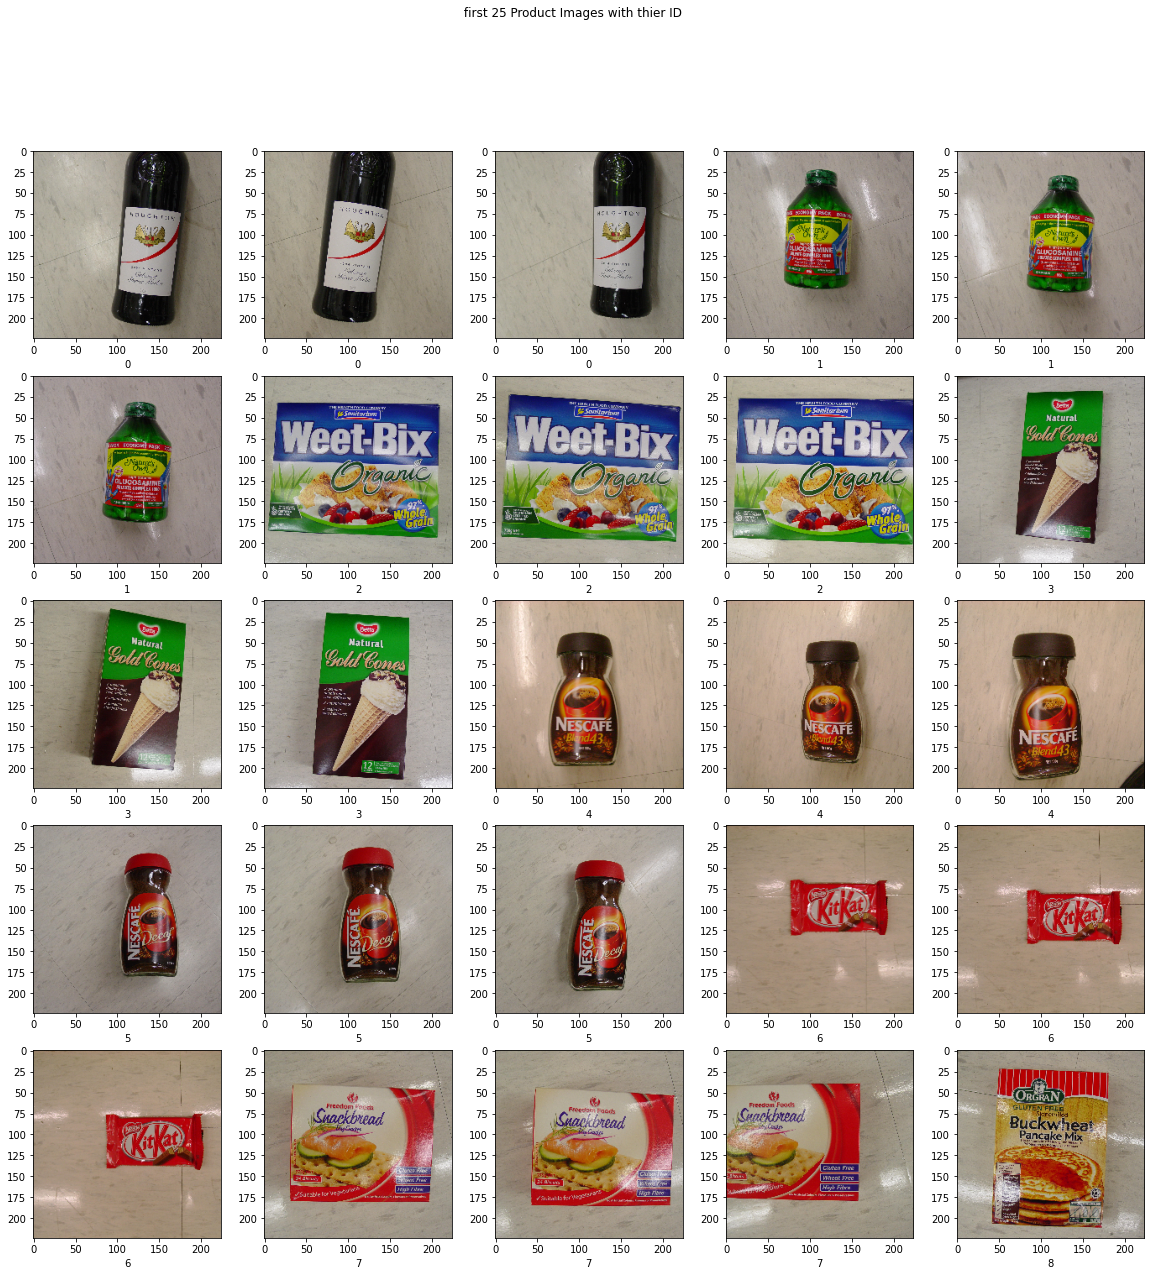

In [ ]:
#plotting product images
fig = plt.figure(figsize=(20,20))
fig.suptitle(' first 25 Product Images with thier ID')
for i in range(25):
  fig.add_subplot(5,5,i+1)
  plt.imshow(imageList[i])
  plt.xlabel(IDList[i])

In [ ]:
imageList[0].shape

(224, 224, 3)

In [ ]:
#converting images to array 

img_array = np.array(imageList)
label_array = np.array(IDList)

print(f'Dataset shape {img_array.shape, label_array.shape}')
print(f'Dataset dtype {img_array.dtype, label_array.dtype}')

Dataset shape ((306, 224, 224, 3), (306,))
Dataset dtype (dtype('float32'), dtype('int64'))


In [ ]:
#function to augment images to increase the size od images in product dataset for training
#keras imagedatagenerator is used for image augmentation . 
AugImage=[]
AugID=[]
def augmentor(img,id):

  datagen1 = ImageDataGenerator(rotation_range=20)
  samples = expand_dims(img, 0)
  it = datagen1.flow(samples, batch_size=1)
  for i in range(3):
    batch = it.next()
    AugImage.append(batch[0])
    AugID.append(id)

  datagen2 = ImageDataGenerator(zoom_range=[0.5,1.0])
  samples = expand_dims(img, 0)
  it = datagen2.flow(samples, batch_size=1)
  for i in range(3):
    batch = it.next()
    AugImage.append(batch[0])
    AugID.append(id)

  datagen3 = ImageDataGenerator(height_shift_range=0.5)
  samples = expand_dims(img, 0)
  it = datagen3.flow(samples, batch_size=1)
  for i in range(3):
    batch = it.next()
    AugImage.append(batch[0])
    AugID.append(id)

  datagen4 = ImageDataGenerator(horizontal_flip=True)
  samples = expand_dims(img, 0)
  it = datagen4.flow(samples, batch_size=1)
  for i in range(3):
    batch = it.next()
    AugImage.append(batch[0])
    AugID.append(id)

  
  plt.show()



In [ ]:
for i in range(len(img_array)):
  augmentor(img_array[i],label_array[i])

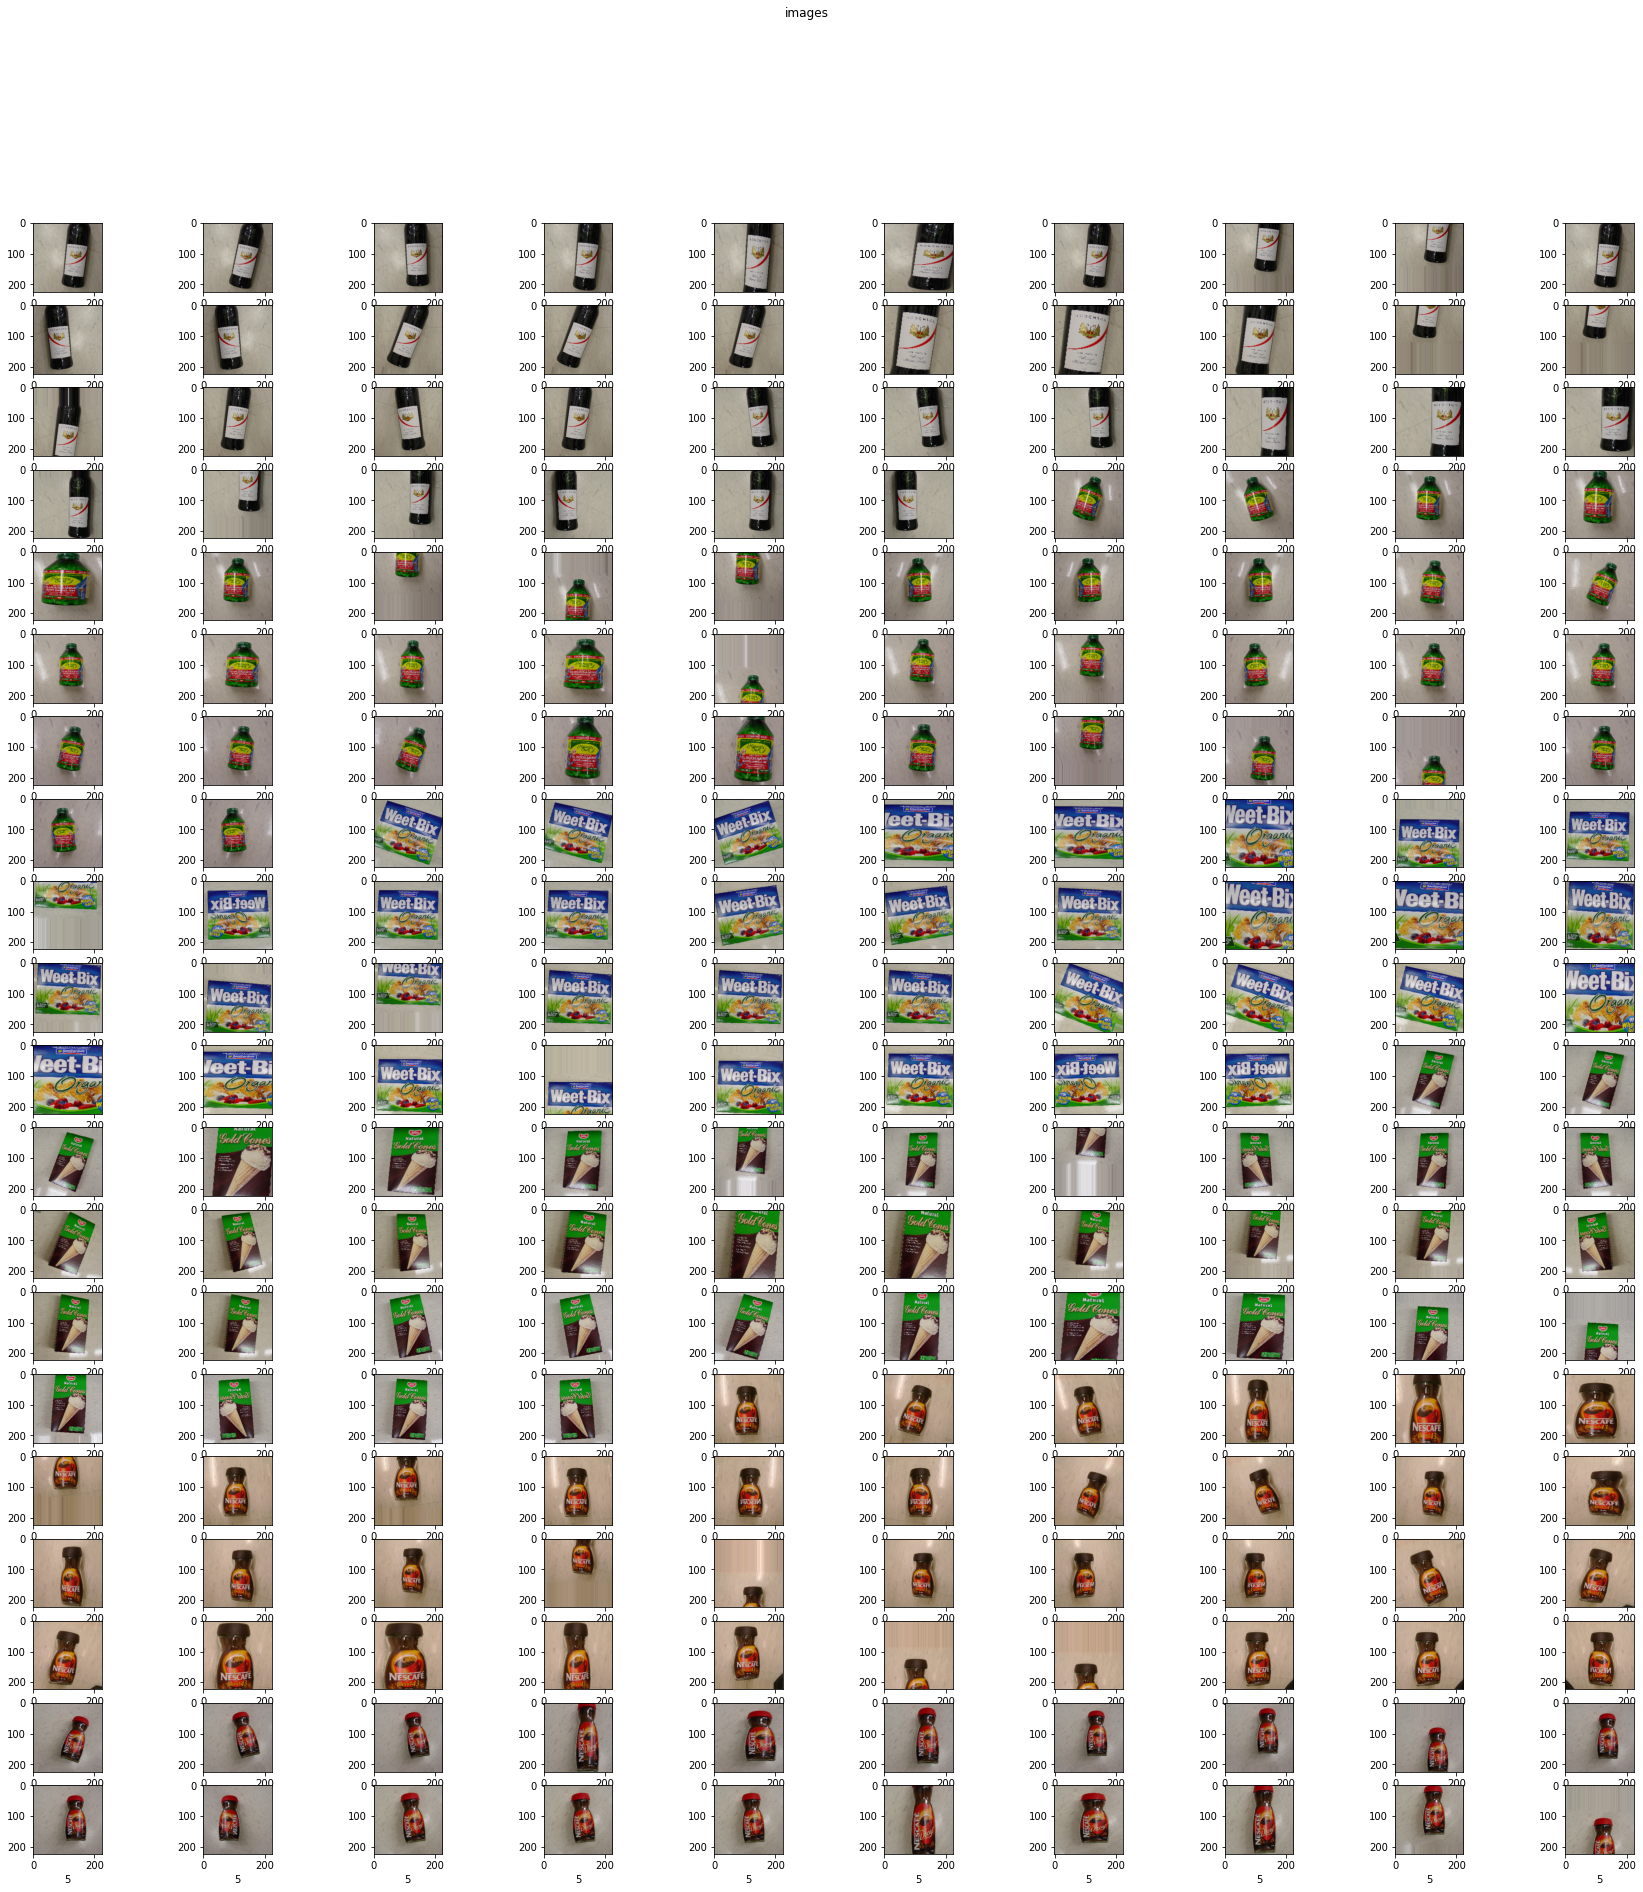

In [ ]:
#plotting sample for augmented image and thier labels
fig = plt.figure(figsize=(30,30))
fig.suptitle('images')
for i in range(200):
  fig.add_subplot(20,10,i+1)
  plt.imshow(AugImage[i])
  plt.xlabel(AugID[i])

In [ ]:
print(np.shape(AugImage))

print(np.shape(AugID))


(3672, 224, 224, 3)
(3672,)


In [ ]:
#converting augmented image to array type
AugImage= np.array(AugImage)
AugID = np.array(AugID)
print(f'Dataset dtype {AugImage.shape, AugID.shape}')
print(f'Dataset dtype {AugImage.dtype, AugID.dtype}')

Dataset dtype ((3672, 224, 224, 3), (3672,))
Dataset dtype (dtype('float32'), dtype('int64'))


In [ ]:
#spliting datasets to training, testing and validation sets.
#stratify is set so images of each class get equally split
#training is 80% and 20% for test and validation which is split equally
X_train,X_remaining,y_train,y_remaining = train_test_split(AugImage,AugID,stratify=AugID, test_size=0.2,shuffle=True,random_state=42)
X_val,X_test,Y_val,Y_test=train_test_split(X_remaining,y_remaining,stratify=y_remaining,test_size=0.5,shuffle=True,random_state=42)

In [ ]:
print(f'Training Dataset shape {X_train.shape, y_train.shape}')
print(f'Training Dataset dtype {X_train.dtype, y_train.dtype}')

print(f'Validation Dataset shape {X_val.shape, Y_val.shape}')
print(f'Validation Dataset dtype {X_val.dtype, Y_val.dtype}')


Training Dataset shape ((2937, 224, 224, 3), (2937,))
Training Dataset dtype (dtype('float32'), dtype('int64'))
Validation Dataset shape ((367, 224, 224, 3), (367,))
Validation Dataset dtype (dtype('float32'), dtype('int64'))


In [ ]:
#using pretrained resnet model for classification
resnetmodel=ResNet101V2(include_top=False,weights='imagenet',input_shape=(224,224,3))

171327488/171317808 [==============================] - 4s 0us/step


In [ ]:
model = resnetmodel.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(102,activation='softmax')(model)
model = tf.keras.models.Model(inputs=resnetmodel.input, outputs = model)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam', metrics= ['accuracy'])

In [ ]:

checkpoint = ModelCheckpoint("resnet101ProductClassification.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)


In [ ]:
#model training for 10 epochs
history = model.fit(X_train,y_train,validation_data=(X_val,Y_val), epochs =10, verbose=1, batch_size=32,
                   callbacks=[checkpoint,reduce_lr])


Epoch 1/10
92/92 [==============================] - ETA: 0s - loss: 1.9020 - accuracy: 0.5843
Epoch 1: val_accuracy improved from -inf to 0.01907, saving model to resnet101ProductClassification.h5
92/92 [==============================] - 74s 569ms/step - loss: 1.9020 - accuracy: 0.5843 - val_loss: 7.6820 - val_accuracy: 0.0191 - lr: 0.0010
Epoch 2/10
92/92 [==============================] - ETA: 0s - loss: 0.2533 - accuracy: 0.9394
Epoch 2: val_accuracy improved from 0.01907 to 0.04087, saving model to resnet101ProductClassification.h5
92/92 [==============================] - 48s 522ms/step - loss: 0.2533 - accuracy: 0.9394 - val_loss: 34.0210 - val_accuracy: 0.0409 - lr: 0.0010
Epoch 3/10
92/92 [==============================] - ETA: 0s - loss: 0.1415 - accuracy: 0.9666
Epoch 3: val_accuracy improved from 0.04087 to 0.36785, saving model to resnet101ProductClassification.h5
92/92 [==============================] - 48s 517ms/step - loss: 0.1415 - accuracy: 0.9666 - val_loss: 3.8480 - v

In [ ]:
#saving the trained model to drive
%cp /content/resnet101ProductClassification.h5 /content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots

In [ ]:
model.evaluate(X_test, Y_test)

12/12 [==============================] - 3s 213ms/step - loss: 0.0098 - accuracy: 0.9973


[0.009826576337218285, 0.9972826242446899]

In [ ]:
#sample predicted
predicted=np.argmax(model.predict(X_test),1)
print(predicted)

[  4  22  82  49  46  29  76  52   7  98  38  17  38  51  27  73  57  62
  47  34   3  14  99  51   0  33  74  81  93  13  15  18  55  54  67  32
  38  27  16  82  13  42  39  33  31  11  56  96   7   5  22  67  21  62
  61  27  54  12  29 100  52  91   1   8  40   7  59  21  62   9  44  10
  87  49  19  64  53  73  16   6   1   5  20  71  18  10  71  92  85  78
  75  16  83  70  75   6  53  11  67  26   2  25  98   9  83  65   3  57
  68  94  72  76   5  77  92  48   0  22  99  59   9  43  30  48  23  75
   8  93  20   1  90  12  32  76  61  63  26  65  68  72  84  72  40  14
  20  87  66  17  45  25  63  50  58  23  34  71  83  93  36  28  69  84
   2  35  94  53  46  66  31  68  95  89   4   4  68  40   8  79  53  58
  44   8  95  82  60  74  69  19  78  73  52  57  83  82  77  58  28  23
  22  96  13  31  43 101  41  64  80  49  44  24  88  66  55  64  42  69
  97  29  52  98  35   4  25  45  61  97  37  97  76  20  24   6  69 100
  47  42  32  70  50  56 100  14  56  49  41  90  4

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         4
          17       1.00    

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


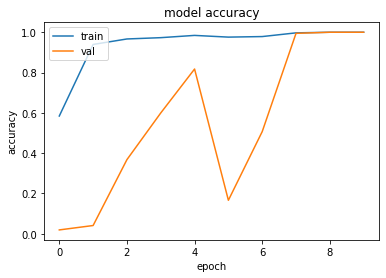

In [ ]:
#accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

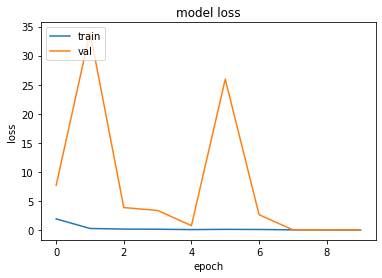

In [ ]:
#loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#evaluating saved model
from keras.models import load_model
loaded_model=load_model("resnet101ProductClassification.h5")
loss, accuracy = loaded_model.evaluate(X_test,Y_test)

12/12 [==============================] - 3s 141ms/step - loss: 0.0104 - accuracy: 0.9973


In [ ]:
#Shelves product detection

#Shelves Product detection

Using already trained model on grocery dataset for object detection .

The grocery detection was trained using Yolov5 on images of SKU110K dataset

github link-https://github.com/shayanalibhatti/Retail-Store-Item-Detection-using-YOLOv5.git





In [ ]:
!git clone https://github.com/shayanalibhatti/Retail-Store-Item-Detection-using-YOLOv5.git

fatal: destination path 'Retail-Store-Item-Detection-using-YOLOv5' already exists and is not an empty directory.


In [ ]:
pwd

'/content'

In [ ]:
%cd /content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots/

/content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots


In [ ]:
#making new directories for storing resized shelfimages for doing inference
%mkdir resizedShelfImages


mkdir: cannot create directory ‘resizedShelfImages’: File exists


In [ ]:
%cd /content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots/resizedShelfImages

/content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots/resizedShelfImages


In [ ]:
pwd

'/content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots/resizedShelfImages'

In [ ]:
path='/content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots/shelf_images/'
imagePath=os.listdir('/content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots/shelf_images/')
imagePath.sort(key=lambda f: int(re.sub('\D', '', f)))
for i in range(len(imagePath)):
  img=plt.imread(path+imagePath[i])
  img=tf.keras.preprocessing.image.smart_resize(img, size = (416,416))
  img-=img.min()
  img/=(img.max()-img.min())
  name="db"+str(i+1)+".jpg"

  plt.imsave(name,img)

In [ ]:
resized=os.listdir('/content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots/resizedShelfImages/')
len(resized)

3153

In [ ]:

%cd /content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots/resizedShelfImages

/content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots/resizedShelfImages


In [ ]:
#inference using already trained grocery dataset model
%cd /content/Retail-Store-Item-Detection-using-YOLOv5/
!python detect.py --weights last_yolov5s_results.pt --img 416 --conf 0.4 --save-txt --source /content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots/resizedShelfImages/

/content/Retail-Store-Item-Detection-using-YOLOv5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', fourcc='mp4v', img_size=416, iou_thres=0.5, output='inference/output', save_txt=True, source='/content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots/resizedShelfImages/', view_img=False, weights='last_yolov5s_results.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

/usr/local/lib/python3.7/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'models.yolo.Model' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve 

In [ ]:
#saving the inference results to drive
!cp -r /content/Retail-Store-Item-Detection-using-YOLOv5/inference /content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots/

solution fro problem2

In [ ]:


import os

In [ ]:
resultsTxtPath='/content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots/inference/output/'
shelfImagePath='/content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots/shelf_images/'

TxtFile= [f for f in os.listdir(resultsTxtPath) if f.endswith('.txt')]
ImgFile= [f for f in os.listdir(shelfImagePath)]

In [ ]:
TxtFilesorted=sorted(TxtFile, key=lambda x: int(x.replace('.txt','').replace('db','')))


In [ ]:
TxtFilesorted

In [ ]:
len(TxtFilesorted)

3101

In [ ]:
ID=TxtFilesorted[0].split('.txt')[0]
txtfile = os.path.join(resultsTxtPath,TxtFilesorted[0])
imgfile = os.path.join(shelfImagePath,ID+'.jpg')

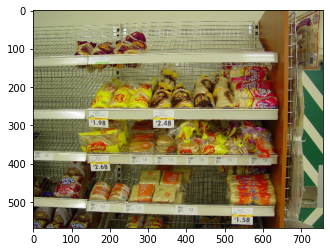

In [ ]:
img = plt.imread(imgfile)
plt.imshow(img)

In [ ]:
imgfileshape = np.flip(np.array(plt.imread(imgfile).shape[:2]))

In [ ]:
imgfileshape

array([757, 568])

In [ ]:
#loding saved model
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots/resnet101ProductClassification.h5')


In [ ]:
# finding the product classes  from grocery shelves 
from tqdm import tqdm
solution1=''
for i in tqdm(TxtFilesorted):
  id = i.split('.txt')[0].replace('db','')
  with open(txtfile, 'r') as file:
    for line in file.readlines():
          (x_,y_,w_,h_) = line.split()[1:]
          x = int(float(x_)*float(imgfileshape[0]))
          y = int(float(y_)*float(imgfileshape[1]))
          w = int(float(w_)*float(imgfileshape[0]))
          h = int(float(h_)*float(imgfileshape[1]))
          x1 = int(x - (w/2))
          y1 = int(y - (h/2))
          Img = np.array(img[y1:y1+h, x1:x1+w])
          ImgResized = tf.keras.preprocessing.image.smart_resize(Img, size = (224,224))
          ImgResized = ImgResized - ImgResized.min()
          ImgResized = ImgResized/(ImgResized.max() - ImgResized.min())
          ImgResized = np.expand_dims(ImgResized, axis = 0)

          prediction = model.predict(ImgResized)
          prediction = np.argmax(prediction, 1)
          shelfnumber=id
          solution1=solution1+str(shelfnumber)+','+str(prediction[0]) +','+str(x1)+','+str(y1)+','+str(x1+w)+','+str(y1+h)+'\n'




100%|██████████| 3101/3101 [1:45:25<00:00,  2.04s/it]


In [ ]:
file1 = open("solution_2.txt","a")
file1.write(solution1)
file1.close()

In [ ]:
%cp /content/solution_2.txt /content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots

solution for problem1


In [ ]:
productsolution=open('/content/gdrive/MyDrive/infilect_assignment/product_detection_from_packshots/solution_2.txt','r')
data= productsolution.readlines()
print(data)

['1,80,363,197,432,252\n', '1,24,209,199,283,256\n', '1,82,436,185,503,256\n', '1,80,291,193,361,250\n', '1,37,298,315,370,375\n', '1,24,240,418,312,446\n', '1,34,501,169,570,257\n', '1,24,294,452,381,502\n', '1,80,209,454,292,501\n', '1,67,565,154,706,250\n', '1,67,0,422,49,494\n', '1,24,141,453,208,500\n', '1,24,153,205,209,254\n', '1,84,69,449,139,496\n', '1,82,452,301,561,376\n', '1,24,202,308,296,370\n', '1,24,602,301,654,374\n', '1,24,370,291,459,374\n', '2,80,363,197,432,252\n', '2,24,209,199,283,256\n', '2,82,436,185,503,256\n', '2,80,291,193,361,250\n', '2,37,298,315,370,375\n', '2,24,240,418,312,446\n', '2,34,501,169,570,257\n', '2,24,294,452,381,502\n', '2,80,209,454,292,501\n', '2,67,565,154,706,250\n', '2,67,0,422,49,494\n', '2,24,141,453,208,500\n', '2,24,153,205,209,254\n', '2,84,69,449,139,496\n', '2,82,452,301,561,376\n', '2,24,202,308,296,370\n', '2,24,602,301,654,374\n', '2,24,370,291,459,374\n', '3,80,363,197,432,252\n', '3,24,209,199,283,256\n', '3,82,436,185,503,2

In [ ]:
data[1]

'1,24,209,199,283,256\n'

In [ ]:
newdata=[]
for i in (range(len(data))):
  data_cleaned=data[i].replace('\n','').split(',')
  newdata.append({ 'productID': data_cleaned[1],'shelvesID':data_cleaned[0],'xmin':data_cleaned[2],'ymin':data_cleaned[3],'xmax':data_cleaned[4],'ymax':data_cleaned[5]})


In [ ]:

newdata[1]

{'productID': '24',
 'shelvesID': '1',
 'xmax': '283',
 'xmin': '209',
 'ymax': '256',
 'ymin': '199'}

In [ ]:
import pandas as pd
newData=pd.DataFrame(newdata)

In [ ]:
newData

productID shelvesID xmin ymin xmax ymax
0            80         1  363  197  432  252
1            24         1  209  199  283  256
2            82         1  436  185  503  256
3            80         1  291  193  361  250
4            37         1  298  315  370  375
...         ...       ...  ...  ...  ...  ...
55813        84      3153   69  449  139  496
55814        82      3153  452  301  561  376
55815        24      3153  202  308  296  370
55816        24      3153  602  301  654  374
55817        24      3153  370  291  459  374

[55818 rows x 6 columns]

In [ ]:
newData=newData.sort_values('productID')

In [ ]:

#saving solution 1

newData.to_csv("solution_1.txt", header = False, sep = ",", index = False)